In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#https://www.kaggle.com/mohitkr05/spotify-data-visualization
df = pd.read_csv('data.csv')
df.head(2)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [6]:
# removing waste stuff(square bracket and quotation marks) from artist's name 
df['artists'] = df['artists'].apply(lambda x: x[1:-1].replace("'", ''))

# correcting data types 
df['release_date'] = pd.to_datetime(df['release_date'])

In [7]:
artists_popularity = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
artists_popularity
#artists_popularity.to_csv('data/artists_popularity.csv', index=True)

artists
The Beatles                 19218
Frank Sinatra               17987
Elvis Presley               17188
The Rolling Stones          16477
Fleetwood Mac               15675
Bob Dylan                   14570
Led Zeppelin                13498
Queen                       13202
Johnny Cash                 12802
The Beach Boys              12216
Taylor Swift                12181
Bob Marley & The Wailers    11116
Vicente Fernández            9957
Red Hot Chili Peppers        9529
Elton John                   9472
Pink Floyd                   9259
Eminem                       9243
Metallica                    9199
Dean Martin                  9133
BTS                          8997
Name: popularity, dtype: int64

C:\Users\marco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'The Beatles'),
  Text(1, 0, 'Frank Sinatra'),
  Text(2, 0, 'Elvis Presley'),
  Text(3, 0, 'The Rolling Stones'),
  Text(4, 0, 'Fleetwood Mac'),
  Text(5, 0, 'Bob Dylan'),
  Text(6, 0, 'Led Zeppelin'),
  Text(7, 0, 'Queen'),
  Text(8, 0, 'Johnny Cash'),
  Text(9, 0, 'The Beach Boys'),
  Text(10, 0, 'Taylor Swift'),
  Text(11, 0, 'Bob Marley & The Wailers'),
  Text(12, 0, 'Vicente Fernández'),
  Text(13, 0, 'Red Hot Chili Peppers'),
  Text(14, 0, 'Elton John'),
  Text(15, 0, 'Pink Floyd'),
  Text(16, 0, 'Eminem'),
  Text(17, 0, 'Metallica'),
  Text(18, 0, 'Dean Martin'),
  Text(19, 0, 'BTS')])

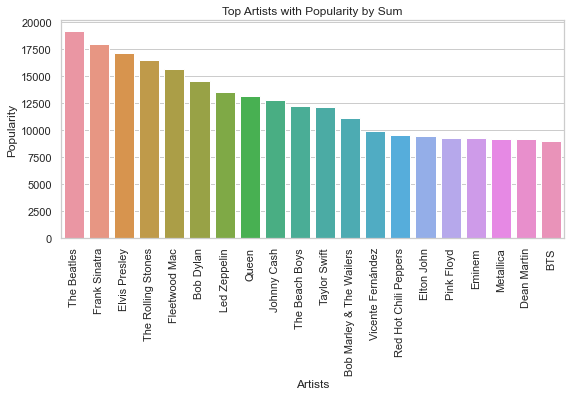

In [8]:
plt.figure(figsize=(9, 4))
sns.set(style="whitegrid")
data = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(data.index, data)
ax.set_title('Top Artists with Popularity by Sum')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

In [10]:
bands = df[(df['artists'] == 'The Beatles') |
             (df['artists'] == 'The Rolling Stones')]
beatles_rolling_stones = bands.groupby(["release_date", "artists"])["popularity"].mean()
beatles_rolling_stones
#beatles_rolling_stones.to_csv('data/beatles_rolling_stones.csv', index=True)

release_date  artists           
1963-03-22    The Beatles           56.428571
1963-11-22    The Beatles           53.642857
1964-01-01    The Rolling Stones    22.333333
1964-04-16    The Rolling Stones    34.916667
1964-05-30    The Rolling Stones    22.166667
                                      ...    
2000-11-13    The Beatles           59.307692
2003-01-01    The Rolling Stones    47.000000
2004-07-12    The Rolling Stones    50.666667
2006-11-17    The Beatles           52.666667
2014-01-01    The Beatles           58.000000
Name: popularity, Length: 62, dtype: float64

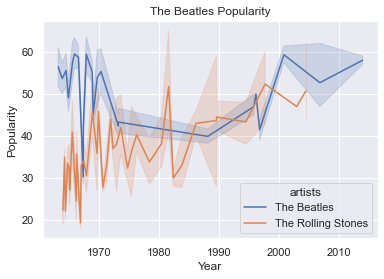

In [11]:
# lets analyze the popularity of The Beatles songs over the year
# grid
sns.set(style='darkgrid')
# line plot passing x,y
sns.lineplot(x='release_date', y='popularity', hue='artists', data=bands)
# Labels
plt.title("The Beatles Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

In [13]:
loudness_by_year = df.groupby("year")["loudness"].mean()
#loudness_by_year.to_csv('data/loudness_by_year.csv', index=True)

Text(0.5, 0, 'Year')

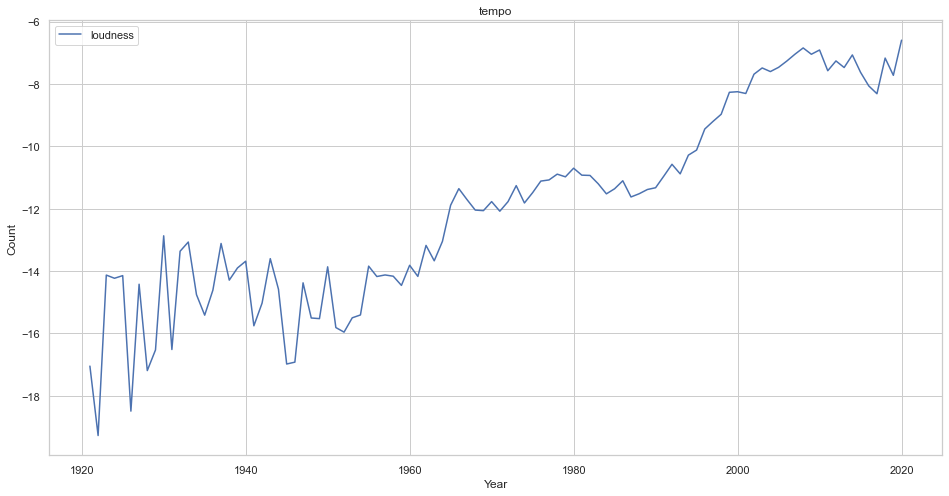

In [14]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('tempo')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

In [15]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
characteristics_by_year = df.groupby("year")[columns].mean()
#characteristics_by_year.to_csv('characteristics_by_year.csv', index=True)

Text(0.5, 0, 'Year')

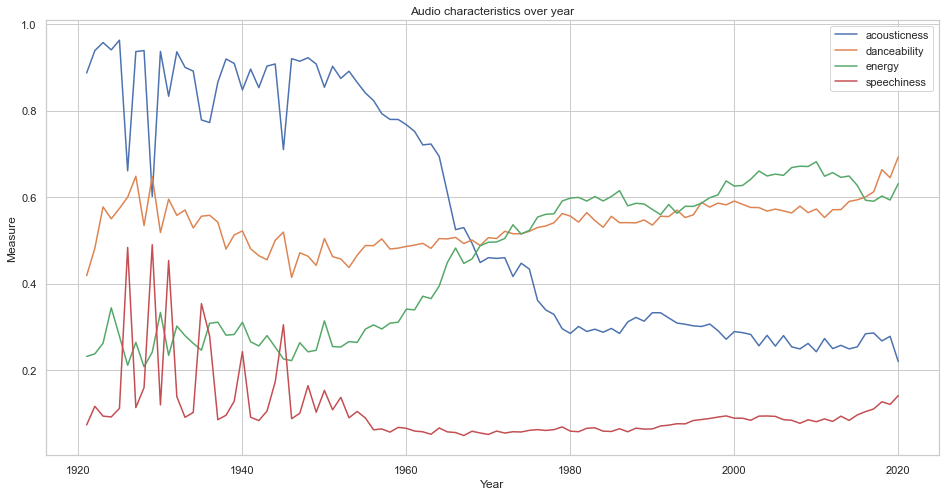

In [16]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

